<a href="https://colab.research.google.com/github/Annabel-Anjala-David/TASK-2/blob/main/Timeseries_Analysis_on_Peoples_Vaccination_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from fbprophet import Prophet
from datetime import datetime, date
from folium import plugins
plt.rcParams['figure.figsize']=10,12
from fbprophet import Prophet

In [ ]:
data = pd.read_csv("/content/Preprocessed Vacc Data.csv")
data.head(5)

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,2021-01-15,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,137.0
2,2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,80.0
3,2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,109.0
4,2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,121.0


In [ ]:
df=data.fillna("0")
df

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,2021-01-15,0.0,0.0,0,0,0,0.0,0.0,0,0
1,2021-01-16,191181.0,191181.0,0,191181.0,191181.0,0.01,0.01,0,137.0
2,2021-01-17,224301.0,224301.0,0,33120.0,112150.0,0.02,0.02,0,80.0
3,2021-01-18,454049.0,454049.0,0,229748.0,151350.0,0.03,0.03,0,109.0
4,2021-01-19,674835.0,674835.0,0,220786.0,168709.0,0.05,0.05,0,121.0
...,...,...,...,...,...,...,...,...,...,...
353,2022-01-03,1464526170.0,852570971.0,611955199.0,7939936.0,6582722.0,105.1,61.19,43.92,4724.0
354,2022-01-04,1472330269.0,857788520.0,614541749.0,7804099.0,6608642.0,105.66,61.56,44.1,4743.0
355,2022-01-05,1482203963.0,864466425.0,617737538.0,9873694.0,6715446.0,106.37,62.04,44.33,4819.0
356,2022-01-06,1491991022.0,871088714.0,620902308.0,9787059.0,7610504.0,107.07,62.51,44.56,5462.0


In [ ]:
df['date']= pd.to_datetime(df['date'], errors='ignore')

In [ ]:
df['date'] = pd.to_datetime(df['date'], format = '%Y/%m/%d')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,2021-01-15 00:00:00,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0
1,2021-01-16 00:00:00,191181.000000,191181.000000,0,191181.000000,191181.000000,0.010000,0.010000,0,137.000000
2,2021-01-17 00:00:00,224301.000000,224301.000000,0,33120.000000,112150.000000,0.020000,0.020000,0,80.000000
3,2021-01-18 00:00:00,454049.000000,454049.000000,0,229748.000000,151350.000000,0.030000,0.030000,0,109.000000
4,2021-01-19 00:00:00,674835.000000,674835.000000,0,220786.000000,168709.000000,0.050000,0.050000,0,121.000000


In [ ]:
from fbprophet import Prophet
ds=pd.DataFrame(columns=['ds','y'])

ds['ds']=df['date']
ds['y']=df['people_vaccinated']
model = Prophet(changepoint_range=1)
model.fit(ds)
future = model.make_future_dataframe(periods=20)
f=model.predict(future)
f['ds']=pd.to_datetime(f['ds'], format='%Y-%m-%d')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


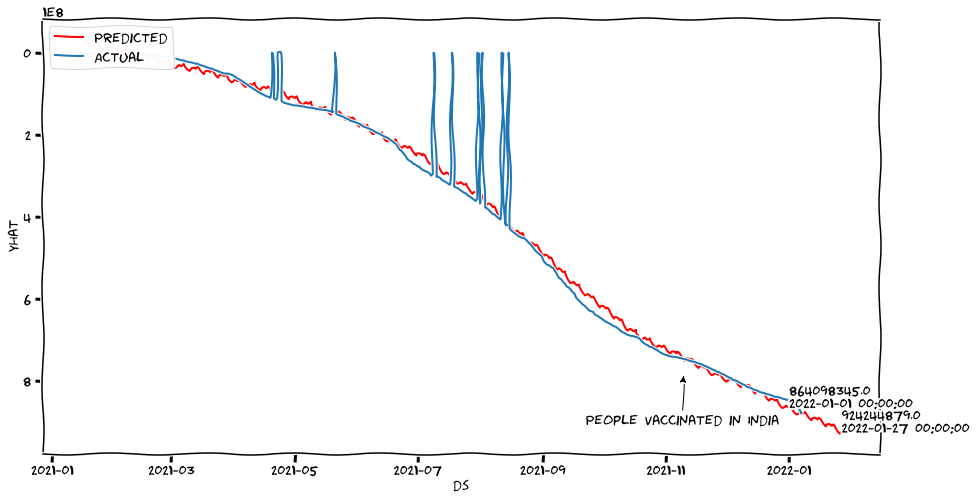

In [ ]:
today=f[f['ds']=='2022-01-1 00:00:00']
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    
        
    ax=sns.lineplot(data=f, x='ds',y='yhat', alpha=1, color='red')
    ax=sns.lineplot(data=df, x='date',y='people_vaccinated')
    
    
    ax.annotate(s=str(np.round(f['yhat'].iloc[-1],0))+ "\n"+ str(f['ds'].iloc[-1]), xy=(f['ds'].iloc[-1],f['yhat'].iloc[-1]))
    ax.annotate(s=str(np.round(today['yhat'].iloc[-1],0))+ "\n"+ str(today['ds'].iloc[-1]), xy=(today['ds'].iloc[-1],today['yhat'].iloc[-1]))
    
    ax.annotate(s="People Vaccinated in India", xy=(0.70,0.25), xycoords='figure fraction', xytext=(0.60, 0.15),arrowprops={'arrowstyle':'-|>','color':'black'})
    
    ax.legend(labels=['Predicted','Actual'], loc='upper left')